# Capture Wikipedia polling data and produce LOWESS charts

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Get-Wikipedia-polling-data" data-toc-modified-id="Get-Wikipedia-polling-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Wikipedia polling data</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Data-quality-checks" data-toc-modified-id="Data-quality-checks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data quality checks</a></span></li><li><span><a href="#Attribute-undecideds-(and-force-polls-to-sum-to-100-percent)" data-toc-modified-id="Attribute-undecideds-(and-force-polls-to-sum-to-100-percent)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Attribute undecideds (and force polls to sum to 100 percent)</a></span></li><li><span><a href="#Calculate-2pp-based-on-preference-flows-at-the-2019-election" data-toc-modified-id="Calculate-2pp-based-on-preference-flows-at-the-2019-election-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate 2pp based on preference flows at the 2019 election</a></span></li><li><span><a href="#Quick-plots" data-toc-modified-id="Quick-plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Quick plots</a></span><ul class="toc-item"><li><span><a href="#Plotting-constants" data-toc-modified-id="Plotting-constants-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plotting constants</a></span></li><li><span><a href="#Plots-by-pollster" data-toc-modified-id="Plots-by-pollster-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Plots by pollster</a></span></li></ul></li><li><span><a href="#Exponentially-weigthed-poll-averages" data-toc-modified-id="Exponentially-weigthed-poll-averages-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exponentially weigthed poll averages</a></span><ul class="toc-item"><li><span><a href="#National-2PP-plot" data-toc-modified-id="National-2PP-plot-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>National 2PP plot</a></span></li><li><span><a href="#Plot-calculated-2pp" data-toc-modified-id="Plot-calculated-2pp-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plot calculated 2pp</a></span></li><li><span><a href="#Primary-votes" data-toc-modified-id="Primary-votes-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Primary votes</a></span></li><li><span><a href="#Preferred-Prime-Minister" data-toc-modified-id="Preferred-Prime-Minister-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Preferred Prime Minister</a></span></li><li><span><a href="#Satisfaction-charts" data-toc-modified-id="Satisfaction-charts-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Satisfaction charts</a></span></li></ul></li><li><span><a href="#Save-files" data-toc-modified-id="Save-files-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save files</a></span></li><li><span><a href="#Check-for-any-problems-with-data-capture-and-cleaning" data-toc-modified-id="Check-for-any-problems-with-data-capture-and-cleaning-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Check for any problems with data capture and cleaning</a></span></li></ul></div>

## Python set-up

In [1]:
# data science imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

# standard python imports
import platform, sys, os, pathlib
from io import StringIO
from typing import List

# local imports
import common
from common import COLOR_COALITION, COLOR_LABOR, COLOR_OTHER, COLOR_GREEN
from common import P_COLOR_COALITION, P_COLOR_LABOR, P_COLOR_OTHER, P_COLOR_GREEN

In [2]:
# Versions ...
print(f'python: {platform.python_version()}')
print(f'numpy: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'matplotlib: {mpl.__version__}')
print(f'statsmodels: {sm.__version__}')

python: 3.9.7
numpy: 1.21.4
pandas: 1.3.5
matplotlib: 3.5.1
statsmodels: 0.13.1


In [3]:
# pandas 
pd.set_option('display.max_rows', 1000)

In [4]:
# plotting stuff
plt.style.use('./markgraph.mplstyle')
LFOOTER = 'Polling data from Wikipedia'

In [5]:
# saving downloaded files
DATA_DIR = '../data'
pathlib.Path(DATA_DIR).mkdir(parents=True, exist_ok=True)
DATA_DIR += '/'

## Get Wikipedia polling data

In [6]:
WIKIURL = (
    'https://en.wikipedia.org/wiki/'
    'Opinion_polling_for_the_next_Australian_federal_election'
)
text = common.get_url_text(WIKIURL)

In [7]:
def extract_polling_tables(text):
    sought = {
        # description:              table number in wiki page
        "Voting intention":         0,
        "Preferred prime minister": 2,
    }

    table_dict = {}
    for item, table_number in sought.items():
        table_dict[item] = common.get_table_from_text(table_number, text)
  
    return table_dict

table_dict = extract_polling_tables(text)

In [8]:
# Web scraping is always a little fragile
# we check the tables extracted here:

for key, table in table_dict.items():
    print(key)
    display(table.iloc[:3])
    print('=' * 40)

Voting intention


Date  \
                  Unnamed: 0_level_1   
0  27–28 November, 4–5 December 2021   
1                  1–4 December 2021   
2                    3 December 2021   

                                               Brand  \
                                  Unnamed: 1_level_1   
0                                      Roy Morgan[1]   
1                                 Newspoll-YouGov[2]   
2  Labor announces 43% cut to emissions by 2030 a...   

                                      Interview mode  \
                                  Unnamed: 2_level_1   
0                                   Telephone/Online   
1                                             Online   
2  Labor announces 43% cut to emissions by 2030 a...   

                                         Sample size  \
                                  Unnamed: 3_level_1   
0                                               2805   
1                                               1518   
2  Labor announces 43% cut to emissions by 2030 a...   

                                        Primary vote  \
                                                L/NP   
0                                              34.5%   
1                                                36%   
2  Labor announces 43% cut to emissions by 2030 a...   

                                                      \
                                                 ALP   
0                                                36%   
1                                                38%   
2  Labor announces 43% cut to emissions by 2030 a...   

                                                      \
                                                 GRN   
0                                              12.5%   
1                                                10%   
2  Labor announces 43% cut to emissions by 2030 a...   

                                                      \
                                                 ONP   
0                                               3.5%   
1                                                 3%   
2  Labor announces 43% cut to emissions by 2030 a...   

                                                      \
                                                 OTH   
0                                              13.5%   
1                                                13%   
2  Labor announces 43% cut to emissions by 2030 a...   

                                                      \
                                                 UND   
0                                                NaN   
1                                                NaN   
2  Labor announces 43% cut to emissions by 2030 a...   

                                            2pp vote  \
                                                L/NP   
0                                              43.5%   
1                                                47%   
2  Labor announces 43% cut to emissions by 2030 a...   

                                                      \
                                                 ALP   
0                                              56.5%   
1                                                53%   
2  Labor announces 43% cut to emissions by 2030 a...   

                                                      
                                                 UND  
0                                                NaN  
1                                                NaN  
2  Labor announces 43% cut to emissions by 2030 a...

Preferred prime minister


Date              Brand               Firm  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0    1–4 December 2021        Newspoll[2]             YouGov   
1  10–13 November 2021        Newspoll[5]             YouGov   
2   20–23 October 2021       Newspoll[13]             YouGov   

      Interview mode        Sample size Preferred Prime Minister           \
  Unnamed: 3_level_1 Unnamed: 4_level_1                 Morrison Albanese   
0             Online                NaN                      45%      36%   
1             Online                NaN                      46%      38%   
2             Online                NaN                      48%      34%   

              Morrison                          Albanese               \
  Don't Know Satisfied Dissatisfied Don't Know Satisfied Dissatisfied   
0        19%       44%          52%         4%       39%          45%   
1        16%       44%          52%         4%       37%          48%   
2        18%       46%          50%         4%       37%          46%   

              
  Don't Know  
0        16%  
1        15%  
2        17%

## Data cleaning

In [9]:
cleaned = {}
for key, table in table_dict.items():
    cleaned[key] = common.clean(table)
    print(key)
    display(cleaned[key].tail(3))

Voting intention


Date              Brand  \
                                                                      
(Mean Date, )                                                         
2021-11-19                   17-21 November 2021  Resolve Strategic   
2021-12-01     27–28 November, 4–5 December 2021         Roy Morgan   
2021-12-02                     1–4 December 2021    Newspoll-YouGov   

                 Interview mode Sample size Primary vote                   \
                                                    L/NP   ALP   GRN  ONP   
(Mean Date, )                                                               
2021-11-19               Online      1781.0         39.0  32.0  11.0  3.0   
2021-12-01     Telephone/Online      2805.0         34.5  36.0  12.5  3.5   
2021-12-02               Online      1518.0         36.0  38.0  10.0  3.0   

                        2pp vote            
                OTH UND     L/NP   ALP UND  
(Mean Date, )                               
2021-11-19     14.0 NaN      NaN   NaN NaN  
2021-12-01     13.5 NaN     43.5  56.5 NaN  
2021-12-02     13.0 NaN     47.0  53.0 NaN

Preferred prime minister


Date     Brand    Firm Interview mode  \
                                                                      
(Mean Date, )                                                         
2021-10-21      20–23 October 2021  Newspoll  YouGov         Online   
2021-11-11     10–13 November 2021  Newspoll  YouGov         Online   
2021-12-02       1–4 December 2021  Newspoll  YouGov         Online   

              Sample size Preferred Prime Minister                      \
                                          Morrison Albanese Don't Know   
(Mean Date, )                                                            
2021-10-21            NaN                     48.0     34.0       18.0   
2021-11-11            NaN                     46.0     38.0       16.0   
2021-12-02            NaN                     45.0     36.0       19.0   

               Morrison                          Albanese               \
              Satisfied Dissatisfied Don't Know Satisfied Dissatisfied   
(Mean Date, )                                                            
2021-10-21         46.0         50.0        4.0      37.0         46.0   
2021-11-11         44.0         52.0        4.0      37.0         48.0   
2021-12-02         44.0         52.0        4.0      39.0         45.0   

                          
              Don't Know  
(Mean Date, )             
2021-10-21          17.0  
2021-11-11          15.0  
2021-12-02          16.0

## Data quality checks

In [10]:
vi = cleaned['Voting intention'].copy()
attitudinal = cleaned['Preferred prime minister'].copy()

In [11]:
def check_row_sums(df: pd.DataFrame, columns: str) -> None:
    """Identify when rows do not add to 100%."""
    
    row_totals = (
        df[
            df.columns[
                df
                .columns
                .get_level_values(0) == columns
            ]
        ]
        .sum(axis=1, skipna=True)
    )
    problematic = (row_totals != 0) & ((row_totals < 99) | (row_totals > 101))

    # If any rows have any row-addition problem ... let's report them
    if problematic.any():
        common.warn(f'check_row_sums() found issues with {columns}')
        display(df[problematic]) # the problematic rows
        display(row_totals[problematic]) # row-totals for these rows
        print('=' * 50)

In [12]:
check_row_sums(vi, '2pp vote')
check_row_sums(vi, 'Primary vote')

check_row_sums() found issues with Primary vote


Date                           Brand  \
                                                                              
(Mean Date, )                                                                 
2020-01-27     20 January – 3 February 2020  Australian National University   
2021-07-05                      5 July 2021                       Essential   
2021-09-27                27 September 2021                       Essential   

              Interview mode Sample size Primary vote                         \
                                                 L/NP   ALP   GRN  ONP   OTH   
(Mean Date, )                                                                  
2020-01-27       CATI/Online      3249.0         34.8  33.4  14.7  NaN  10.5   
2021-07-05            Online         NaN         37.0  36.0   8.0  4.0   5.0   
2021-09-27            Online         NaN         38.0  36.0   9.0  3.0   6.0   

                   2pp vote             
               UND     L/NP   ALP  UND  
(Mean Date, )                           
2020-01-27     NaN      NaN   NaN  NaN  
2021-07-05     8.0     44.0  48.0  8.0  
2021-09-27     6.0     46.0  48.0  6.0

(Mean Date, )
2020-01-27    93.4
2021-07-05    98.0
2021-09-27    98.0
dtype: float64

In [13]:
check_row_sums(attitudinal, 'Preferred Prime Minister')
check_row_sums(attitudinal, 'Morrison')
check_row_sums(attitudinal, 'Albanese')

check_row_sums() found issues with Albanese


Date     Brand    Firm Interview mode Sample size  \
                                                                              
(Mean Date, )                                                                 
2020-08-06     5–8 August 2020  Newspoll  YouGov         Online      1509.0   

              Preferred Prime Minister                      Morrison  \
                              Morrison Albanese Don't Know Satisfied   
(Mean Date, )                                                          
2020-08-06                        60.0     25.0       15.0      68.0   

                                       Albanese                          
              Dissatisfied Don't Know Satisfied Dissatisfied Don't Know  
(Mean Date, )                                                            
2020-08-06            29.0        3.0      41.0         38.0       15.0

(Mean Date, )
2020-08-06    94.0
dtype: float64

## Attribute undecideds (and force polls to sum to 100 percent)

And remove the hierarchical index

In [14]:
def attribute(column, og):
    data = og[og.columns[og.columns.get_level_values(0) == column]].copy()
    
    data = data.drop((column, 'UND'), axis=1)
    row_totals = data.sum(axis=1, skipna=True)
    for c in data.columns:
        data[c] = data[c] + (100 - row_totals)*(data[c]/row_totals)
    
    adds = ["Date", "Mean Date", "Brand", "Interview mode", "Sample size"]
    for c in adds:
        data[c] = og[c]
        
    return data

In [15]:
vi = cleaned['Voting intention'].reset_index()

tpp = attribute('2pp vote', vi).copy()
tpp.columns = common.flatten_col_names(tpp.columns)
tpp = tpp[tpp['2pp vote L/NP'].notna()] # remove nans

pv = attribute('Primary vote', vi).copy()
pv.columns = common.flatten_col_names(pv.columns)
pv = pv[pv['Primary vote L/NP'].notna()] # remove nans

ppm = cleaned['Preferred prime minister'].reset_index().copy()
ppm.columns = common.flatten_col_names(ppm.columns)

del vi

In [16]:
# A quick sanity check on the final tables ...
# Are the values within the typical long-run expectations
def final_sanity_check():
    checker = {
        # column: [in-DataFrame, middle-value, plus-or-minus-span]
        '2pp vote L/NP': [tpp, 50, 6],
        '2pp vote ALP': [tpp, 50, 6],
        'Primary vote L/NP': [pv, 39, 7],
        'Primary vote ALP': [pv, 39, 8],
        'Primary vote GRN': [pv, 12, 7],
        'Primary vote OTH': [pv, 12, 7],
        'Primary vote ONP': [pv, 4, 3.5],
    }

    # check for any odd rows
    for col, (df, target, threshold) in checker.items():
        odd = df[col].notna() & ((df[col] - target).abs() > threshold)
        if odd.sum():
            common.warn(f'final_sanity_check() found an issue with "{col}"')
            display(df[odd])

final_sanity_check()

final_sanity_check() found an issue with "2pp vote L/NP"


,2pp vote L/NP,2pp vote ALP,Date,Mean Date,Brand,Interview mode,Sample size
105,43.5,56.5,"27–28 November, 4–5 December 2021",2021-12-01,Roy Morgan,Telephone/Online,2805.0


final_sanity_check() found an issue with "2pp vote ALP"


,2pp vote L/NP,2pp vote ALP,Date,Mean Date,Brand,Interview mode,Sample size
105,43.5,56.5,"27–28 November, 4–5 December 2021",2021-12-01,Roy Morgan,Telephone/Online,2805.0


## Calculate 2pp based on preference flows at the 2019 election

In [17]:
vote_transfer = """
from,              transfer to L/NP, transfer to ALP
Primary vote L/NP, 0.999,             0.001
Primary vote ALP,  0.0,               1.0
Primary vote GRN,  0.178,             0.822
Primary vote ONP,  0.652,             0.348
Primary vote OTH,  0.539,             0.461
"""
vt = pd.read_csv(StringIO(vote_transfer), header=0, index_col=0,
                  skipinitialspace=True)

# Check that the rows in this table all sum to 1
if not (vt.sum(axis=1) == 1.0).all():
    common.warn('Check the primary vote transfer table used for calculating 2pp')

In [18]:
pv['Calculated 2pp L/NP'] = pv[vt.index].mul(vt['transfer to L/NP'], axis=1).sum(axis=1)
pv['Calculated 2pp ALP'] = pv[vt.index].mul(vt['transfer to ALP'], axis=1).sum(axis=1)

# identify any problematic cases where this does not add to 100% - 
# note: sometimes generates false positives because of FP arithmetic issues
summer = ['Calculated 2pp L/NP', 'Calculated 2pp ALP']
problematic = (pv[summer].sum(axis=1) - 100.0).abs() > 0.001
if problematic.sum():
    common.warn(f'Problematic calculation of 2pp vote share from primary vote polling')
    display(pv[problematic])
    pv.loc[problematic][summer].sum(axis=1)

In [19]:
# let's look at the more than one percentage point mismatch rows with pollster calculated 2pp
combo = pv.copy()
del combo['Calculated 2pp ALP']
combo['2pp vote L/NP'] = tpp['2pp vote L/NP']
problematic = (combo['2pp vote L/NP'] - combo['Calculated 2pp L/NP']).abs() >= 1.0
combo[problematic]

,Primary vote L/NP,Primary vote ALP,Primary vote GRN,Primary vote ONP,Primary vote OTH,Date,Mean Date,Brand,Interview mode,Sample size,Calculated 2pp L/NP,2pp vote L/NP
20,42.500000,34.500000,10.500000,4.000000,8.500000,"13–14, 20–21 June 2020",2020-06-17,Roy Morgan,Telephone/Online,2593.0,51.516000,50.500000
29,42.222222,37.777778,10.000000,4.444444,5.555556,10 August 2020,2020-08-10,Essential,Online,NaN,49.852222,51.111111
31,41.935484,37.634409,9.677419,4.301075,6.451613,24 August 2020,2020-08-24,Essential,Online,NaN,49.897849,51.086957
33,41.304348,34.782609,10.869565,3.260870,9.782609,7 September 2020,2020-09-07,Essential,Online,NaN,50.596739,48.913043
35,45.054945,34.065934,10.989011,4.395604,5.494505,21 September 2020,2020-09-21,Essential,Online,NaN,52.793407,53.846154
39,41.935484,37.634409,9.677419,3.225806,7.526882,14–19 October 2020,2020-10-16,Essential,Online,NaN,49.776344,51.612903
53,40.217391,36.956522,9.782609,4.347826,8.695652,1 March 2021,2021-03-01,Essential,Online,NaN,49.440217,48.387097
69,40.425532,37.234043,10.638298,4.255319,7.446809,7 June 2021,2021-06-07,Essential,Online,NaN,49.067021,47.826087
85,37.500000,38.500000,11.500000,3.000000,9.500000,"21–22, 28–29 August 2021",2021-08-25,Roy Morgan,Telephone/Online,2735.0,46.586000,45.500000
88,39.303483,34.825871,12.935323,2.985075,9.950249,"4–5, 11–12 September 2021",2021-09-08,Roy Morgan,Telephone/Online,2735.0,48.876119,47.500000


In [20]:
# warn if the mismatch is greater than 2.5 percentage points
THRESHOLD = 2.5
problematic = (combo['2pp vote L/NP'] - combo['Calculated 2pp L/NP']).abs() > THRESHOLD
if problematic.sum():
    common.warn('There is a substantial mismatch with pollster 2pp at\n\t'
         f'{combo.loc[problematic, "Mean Date"].dt.date.values}')
    display(combo[problematic])

There is a substantial mismatch with pollster 2pp at
	[datetime.date(2021, 11, 17) datetime.date(2021, 12, 1)]


,Primary vote L/NP,Primary vote ALP,Primary vote GRN,Primary vote ONP,Primary vote OTH,Date,Mean Date,Brand,Interview mode,Sample size,Calculated 2pp L/NP,2pp vote L/NP
103,35.5,35.5,12.0,3.5,13.5,"13–14, 20–21 November 2021",2021-11-17,Roy Morgan,Telephone/Online,2795.0,47.159,44.5
105,34.5,36.0,12.5,3.5,13.5,"27–28 November, 4–5 December 2021",2021-12-01,Roy Morgan,Telephone/Online,2805.0,46.249,43.5


In [21]:
pv.tail()

,Primary vote L/NP,Primary vote ALP,Primary vote GRN,Primary vote ONP,Primary vote OTH,Date,Mean Date,Brand,Interview mode,Sample size,Calculated 2pp L/NP,Calculated 2pp ALP
102,37.000000,38.000000,11.000000,2.000000,12.000000,10–13 November 2021,2021-11-11,Newspoll-YouGov,Online,1524.0,46.693000,53.307000
103,35.500000,35.500000,12.000000,3.500000,13.500000,"13–14, 20–21 November 2021",2021-11-17,Roy Morgan,Telephone/Online,2795.0,47.159000,52.841000
104,39.393939,32.323232,11.111111,3.030303,14.141414,17-21 November 2021,2021-11-19,Resolve Strategic,Online,1781.0,50.930303,49.069697
105,34.500000,36.000000,12.500000,3.500000,13.500000,"27–28 November, 4–5 December 2021",2021-12-01,Roy Morgan,Telephone/Online,2805.0,46.249000,53.751000
106,36.000000,38.000000,10.000000,3.000000,13.000000,1–4 December 2021,2021-12-02,Newspoll-YouGov,Online,1518.0,46.707000,53.293000


## Quick plots

### Plotting constants

In [22]:
# constants ...
HALF_LIFE_DAYS = 30 # days
HALF_LIFE = pd.Timedelta(days=HALF_LIFE_DAYS)
LOWESS_PERIOD = 150 # days

# For primaries vote polls ...
PARTIES = ['Coalition', 'Labor', 'Greens', 'Other']
COLUMNS = ['Primary vote L/NP', 'Primary vote ALP', 'Primary vote GRN',
           ['Primary vote ONP', 'Primary vote OTH']]
L_COLORS = [COLOR_COALITION, COLOR_LABOR, COLOR_GREEN, COLOR_OTHER]
P_COLORS = [P_COLOR_COALITION, P_COLOR_LABOR, P_COLOR_GREEN, P_COLOR_OTHER]

# For 2pp polls ...
TPP_PARTIES = ('Coalition', 'Labor')
TPP_P_COLORS = (P_COLOR_COALITION, P_COLOR_LABOR)
TPP_L_COLORS = (COLOR_COALITION, COLOR_LABOR)

# 
FUNCTIONS = common.calculate_ewm, common.calculate_lowess,
ARGUMENTS = HALF_LIFE, LOWESS_PERIOD
LFOOTERS = (
    LFOOTER + f'; Half-life = {HALF_LIFE_DAYS} days.', 
    LFOOTER + f'; LOWESS period = {LOWESS_PERIOD} days.'
)
TITLE_STEMS = 'Exponentially Weighted Poll Average', 'LOWESS Regression'

### Plots by pollster

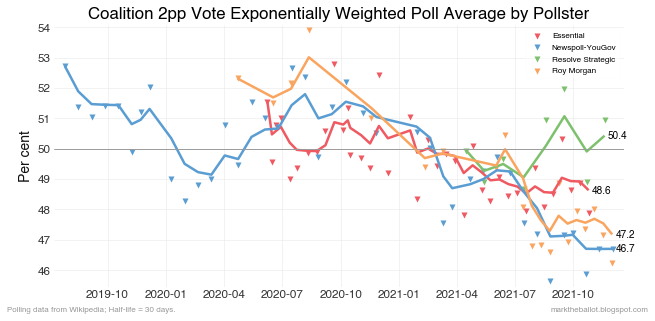

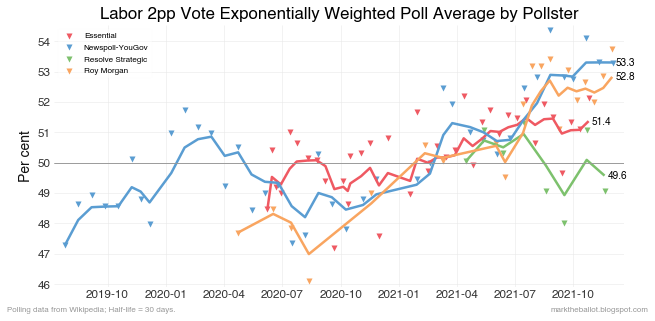

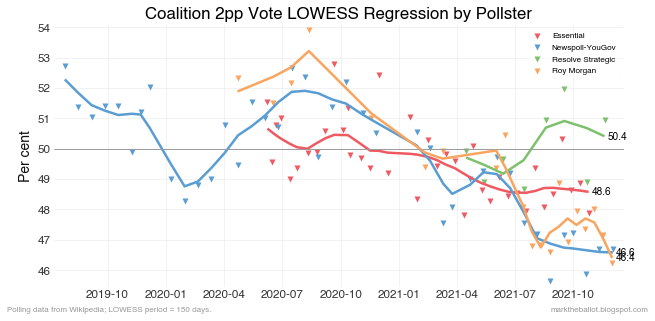

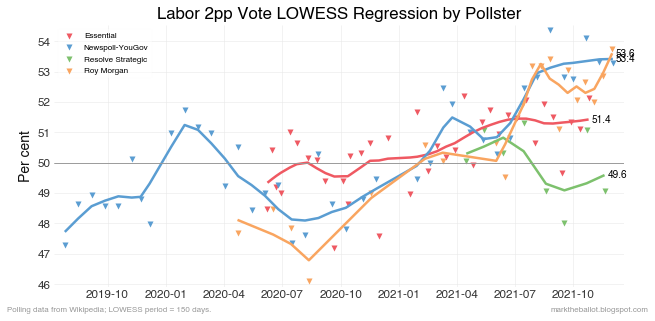

In [23]:
# 2pp ...
TPP_COLUMNS = ('Calculated 2pp L/NP', 'Calculated 2pp ALP')

for function, argument, stem, lfooter in zip(FUNCTIONS, ARGUMENTS, TITLE_STEMS, LFOOTERS):
    for party, column in zip(TPP_PARTIES, TPP_COLUMNS):
        title = f'{party} 2pp Vote {stem} by Pollster'
        common.plot_summary_line_by_pollster(df=pv, 
                                      column=column, 
                                      title=title,
                                      function=function, 
                                      argument=argument, 
                                      lfooter=lfooter)        


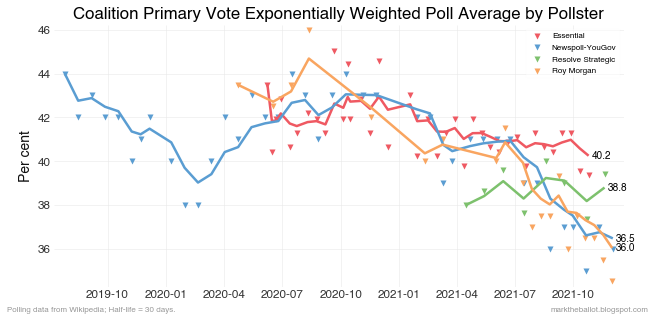

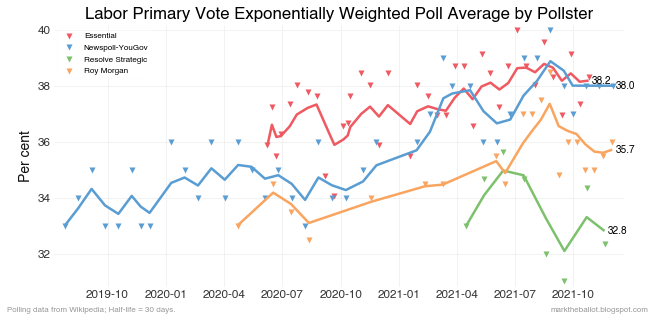

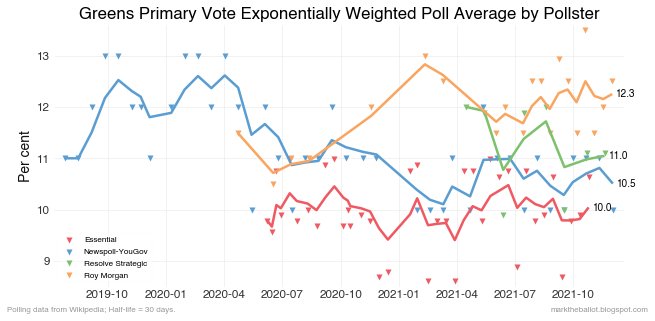

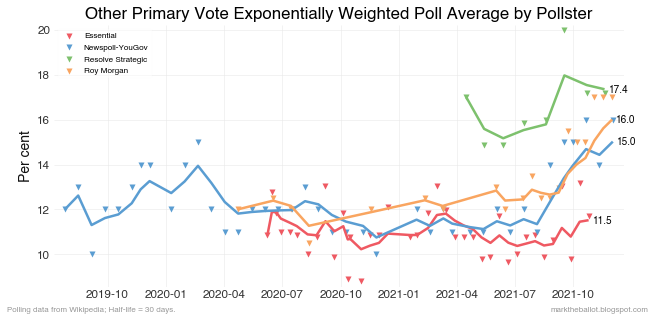

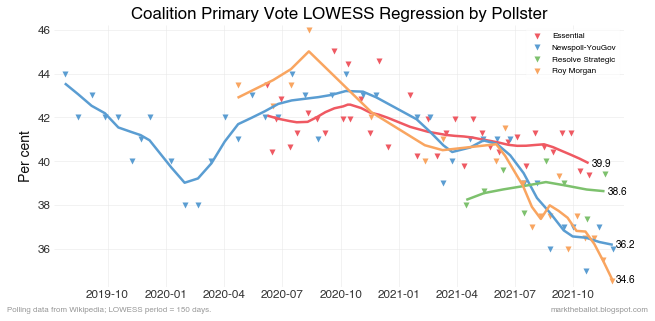

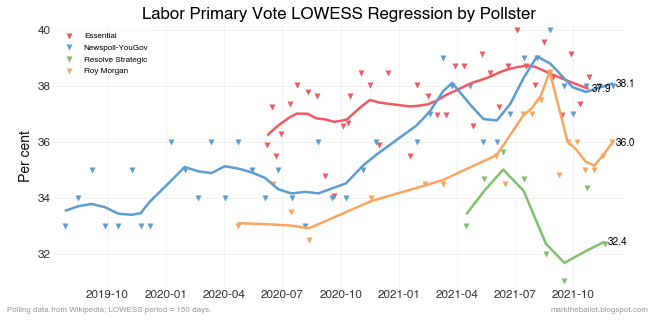

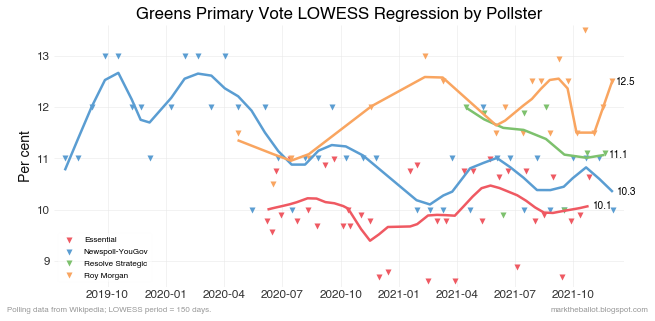

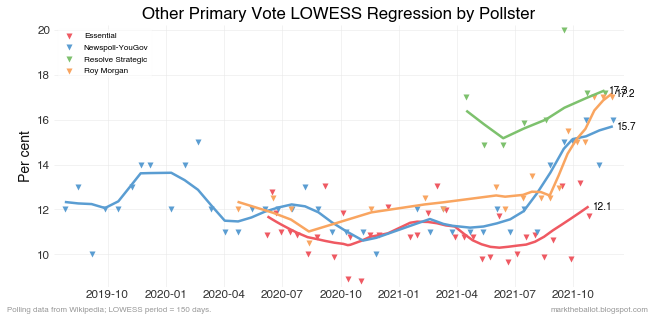

In [24]:
# primary votes ...

for function, argument, stem, lfooter in zip(FUNCTIONS, ARGUMENTS, TITLE_STEMS, LFOOTERS):
    for party, column in zip(PARTIES, COLUMNS):
        title = f'{party} Primary Vote {stem} by Pollster'
        common.plot_summary_line_by_pollster(df=pv, 
                                      column=column, 
                                      title=title,
                                      function=function, 
                                      argument=argument, 
                                      lfooter=lfooter)        

## Exponentially weigthed poll averages

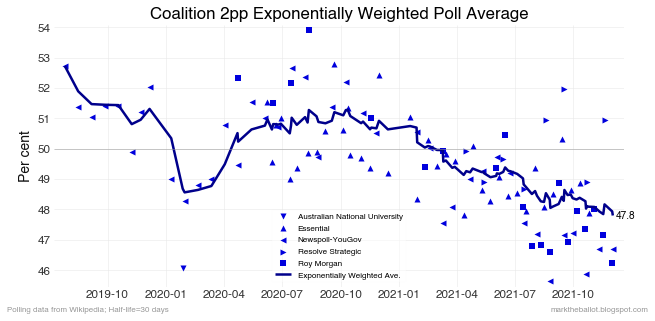

In [25]:
# 2pp ...
common.plot_summary_line(df=pv, column='Calculated 2pp L/NP', 
                  p_color=P_COLOR_COALITION, l_color=COLOR_COALITION, 
                  title='Coalition 2pp Exponentially Weighted Poll Average',
                  function=common.calculate_ewm, 
                  argument=HALF_LIFE, 
                  label='Exponentially Weighted Ave.', 
                  lfooter=LFOOTER + f'; Half-life={HALF_LIFE_DAYS} days')

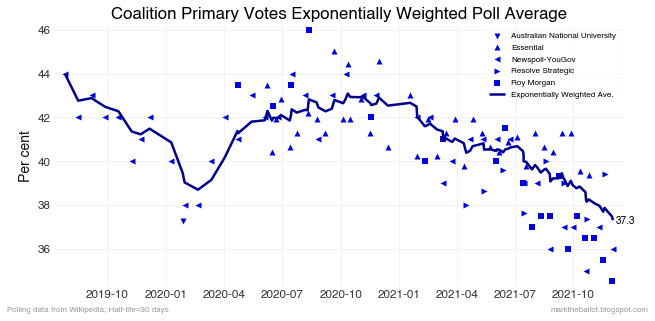

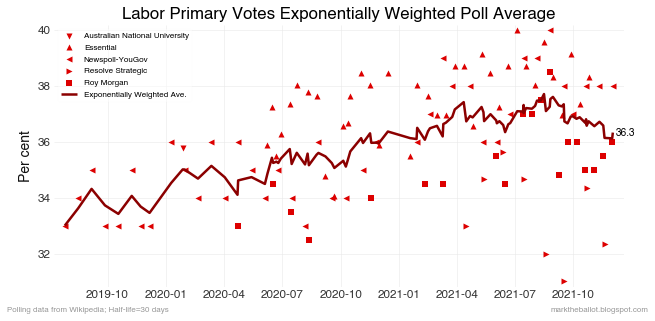

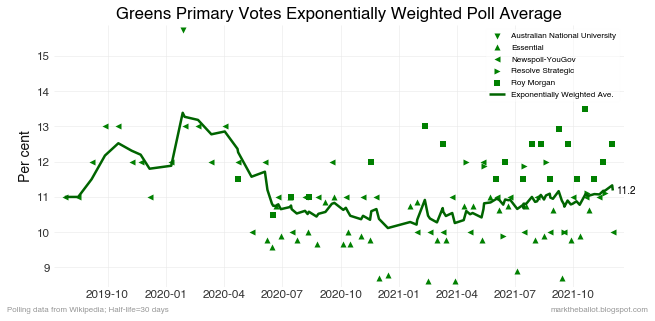

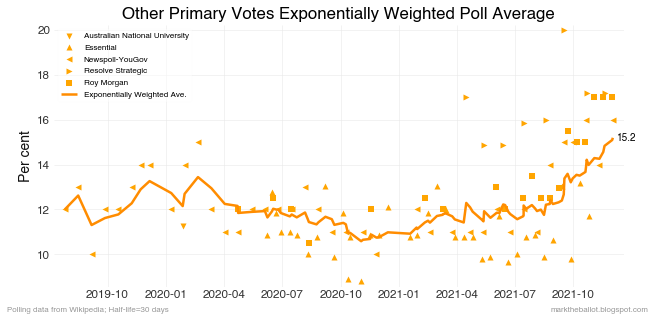

In [26]:
### primary votes ...
for party, column, p_color, l_color in zip(PARTIES, COLUMNS, P_COLORS, L_COLORS):
    title = f'{party} Primary Votes Exponentially Weighted Poll Average'
    common.plot_summary_line(df=pv, column=column, 
                      p_color=p_color, l_color=l_color, 
                      title=title,
                      function=common.calculate_ewm, 
                      argument=HALF_LIFE, 
                      label='Exponentially Weighted Ave.', 
                      lfooter=LFOOTER + f'; Half-life={HALF_LIFE_DAYS} days')

### National 2PP plot

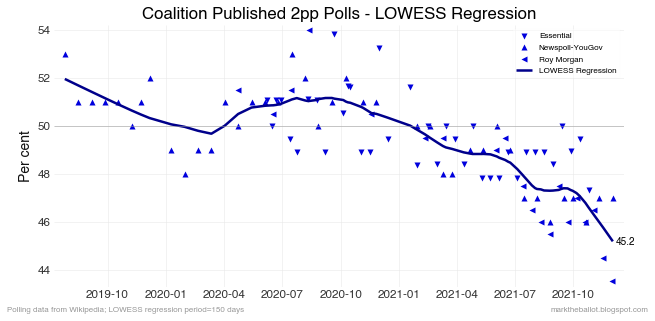

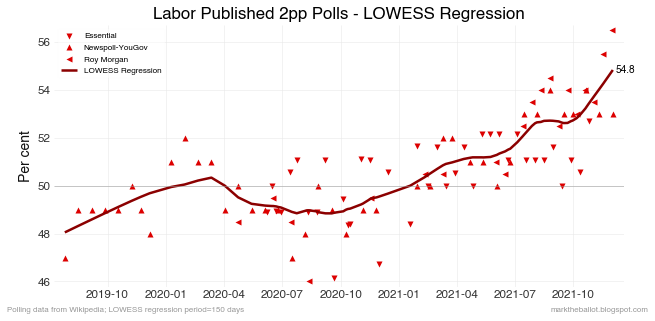

In [27]:
# 2pp as published by the pollster ...
TPP_COLUMNS = ('2pp vote L/NP', '2pp vote ALP')

for party, column, p_color, l_color in zip(TPP_PARTIES, TPP_COLUMNS, TPP_P_COLORS, TPP_L_COLORS):
    title = f'{party} Published 2pp Polls - LOWESS Regression'
    common.plot_summary_line(df=tpp, column=column, 
                      p_color=p_color, l_color=l_color, 
                      title=title,
                      function=common.calculate_lowess, 
                      argument=LOWESS_PERIOD, 
                      label='LOWESS Regression', 
                      lfooter=LFOOTER + f'; LOWESS regression period={LOWESS_PERIOD} days')

### Plot calculated 2pp

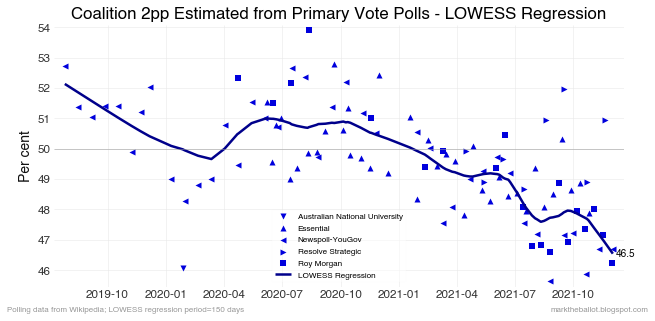

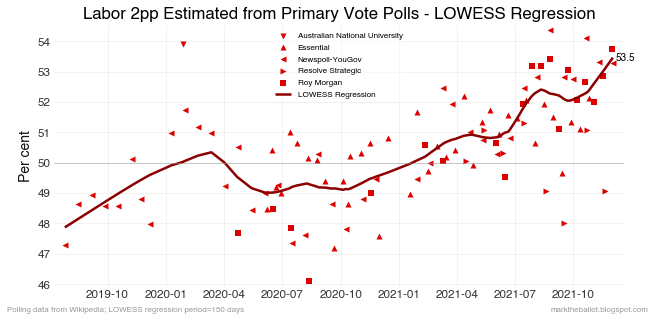

In [28]:
# 2pp as calculated by me ...
TPP_COLUMNS = ('Calculated 2pp L/NP', 'Calculated 2pp ALP')

for party, column, p_color, l_color in zip(TPP_PARTIES, TPP_COLUMNS, TPP_P_COLORS, TPP_L_COLORS):
    title = f'{party} 2pp Estimated from Primary Vote Polls - LOWESS Regression'
    common.plot_summary_line(df=pv, column=column, 
                      p_color=p_color, l_color=l_color, 
                      title=title,
                      function=common.calculate_lowess, 
                      argument=LOWESS_PERIOD, 
                      label='LOWESS Regression', 
                      lfooter=LFOOTER + f'; LOWESS regression period={LOWESS_PERIOD} days')

### Primary votes

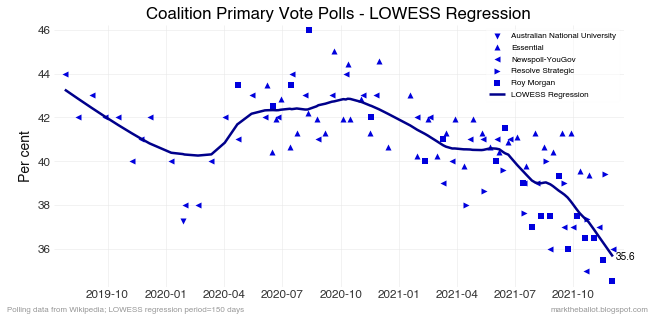

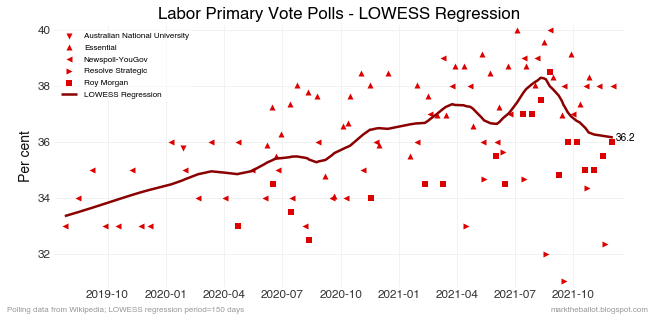

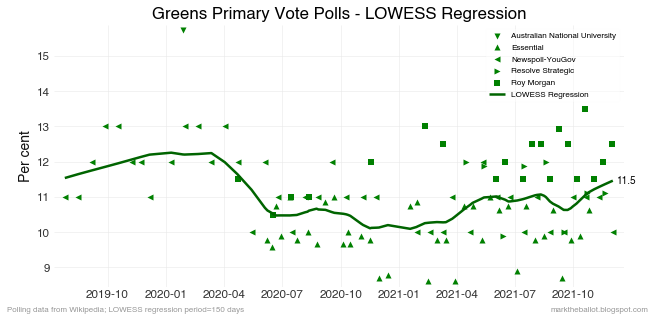

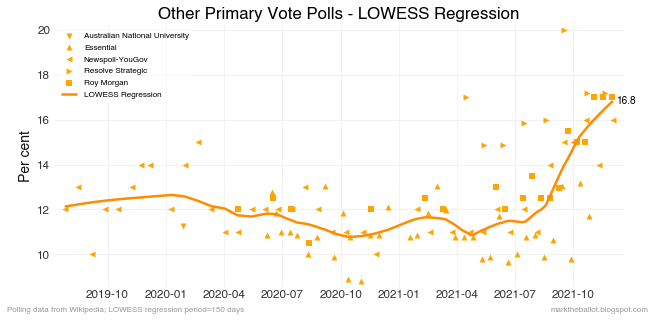

In [29]:
# primary votes from pollsters ...
for party, column, p_color, l_color in zip(PARTIES, COLUMNS, P_COLORS, L_COLORS):
    title = f'{party} Primary Vote Polls - LOWESS Regression'
    common.plot_summary_line(df=pv, column=column, 
                      p_color=p_color, l_color=l_color, 
                      title=title,
                      function=common.calculate_lowess, 
                      argument=LOWESS_PERIOD, 
                      label='LOWESS Regression', 
                      lfooter=LFOOTER + f'; LOWESS regression period={LOWESS_PERIOD} days')

### Preferred Prime Minister

In [30]:
def ppm_charts(df, columns, title):

    ax = None
    no_label = False
    fig, ax = common.initiate_plot()
    for col, (name, p_color, l_color) in columns.items():
        common.add_data_points_by_pollster(ax, df, col, p_color, no_label=no_label)
        no_label = True # avoid repeated labels
        lowess = common.calculate_lowess(ppm[col], ppm['Mean Date'], period=150)
        ax.plot(lowess.index, lowess, c=l_color, lw=2.5, label=name)
    common.add_h_refence(ax, reference=50)
    ax.legend(loc='best', ncol=2)
    common.plot_finalise(ax, ylabel='Per cent', title=title, lfooter=LFOOTER)

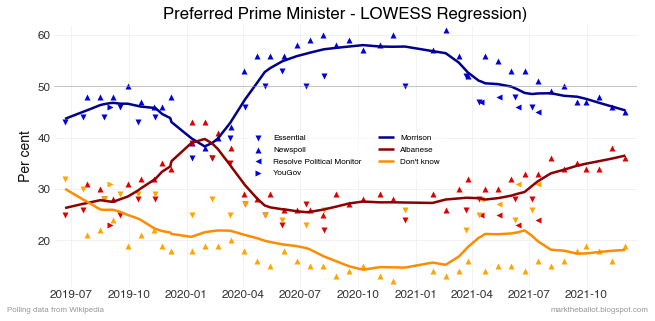

In [31]:
columns = {
    ('Preferred Prime Minister Morrison'): ['Morrison', P_COLOR_COALITION, COLOR_COALITION],    
    ('Preferred Prime Minister Albanese'): ['Albanese', P_COLOR_LABOR, COLOR_LABOR],    
    ("Preferred Prime Minister Don't Know"): ["Don't know", P_COLOR_OTHER, COLOR_OTHER],    
}

title = f'Preferred Prime Minister - LOWESS Regression)'
ppm_charts(ppm, columns, title)

### Satisfaction charts

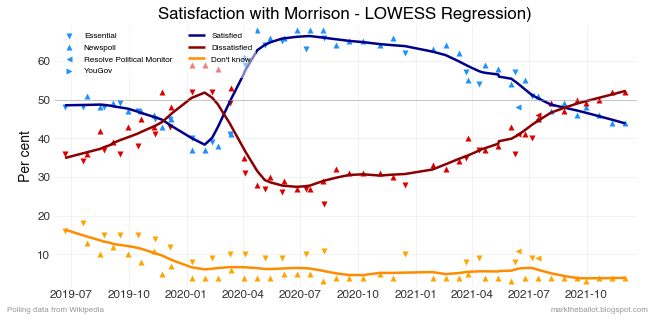

In [32]:
columns = {
    ('Morrison Satisfied'): ["Satisfied", 'dodgerblue', 'darkblue'],    
    ('Morrison Dissatisfied'): ["Dissatisfied", '#dd0000', 'darkred'],    
    ("Morrison Don't Know"): ["Don't know", 'orange', 'darkorange'],    
}

title = f'Satisfaction with Morrison - LOWESS Regression)'
ppm_charts(ppm, columns, title)

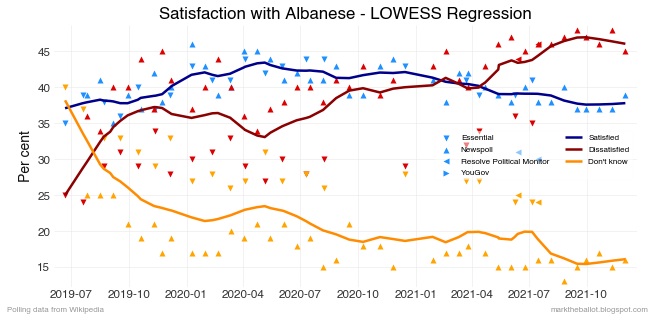

In [33]:
columns = {
    ('Albanese Satisfied'): ["Satisfied", 'dodgerblue', 'darkblue'],    
    ('Albanese Dissatisfied'): ["Dissatisfied", '#dd0000', 'darkred'],    
    ("Albanese Don't Know"): ["Don't know", 'orange', 'darkorange'],    
}

title = f'Satisfaction with Albanese - LOWESS Regression'
ppm_charts(ppm, columns, title)

## Save files

In [34]:
# and save to file
tpp.to_csv(f'{DATA_DIR}two_party_preferred.csv')
pv.to_csv(f'{DATA_DIR}primary_vote.csv')
ppm.to_csv(f'{DATA_DIR}preferred_prime_minister.csv')

## Check for any problems with data capture and cleaning

In [35]:
# Note you should go back and check any warnings that appear here ...
common.print_warnings()

  1: check_row_sums() found issues with Primary vote
  2: check_row_sums() found issues with Albanese
  3: final_sanity_check() found an issue with "2pp vote L/NP"
  4: final_sanity_check() found an issue with "2pp vote ALP"
  5: There is a substantial mismatch with pollster 2pp at
	[datetime.date(2021, 11, 17) datetime.date(2021, 12, 1)]
